# 第二次上机作业
## 杨耕智 19300180112

本次作业都使用  MATLAB 进行编程.

1. 习题 1 所用程序见于
    - .$\backslash$CODES$\backslash$Exercise1_1.m
    - .$\backslash$CODES$\backslash$Exercise1_2.m
    - .$\backslash$CODES$\backslash$Exercise1_3.m
    - .$\backslash$CODES$\backslash$Lagrange_interpolation.m
    - .$\backslash$CODES$\backslash$cubic_spline_interpolation.m


2. 习题 2 所用程序见于
    - .$\backslash$CODES$\backslash$Exercise2_1.m
    - .$\backslash$CODES$\backslash$Exercise2_2.m

### 第一题

在区间 $[-1, 1]$ 上分别取 $n = 10, 20$ 用两组等距结点对龙格函数 $\displaystyle f(x) = \frac{1}{1+25x^2}$ 作多项式插值以及三次样条插值. 对每个 $n$ 值, 分别画出插值函数以及 $f(x)$ 的图形.

首先我们先来考虑实现 Lagrange 多项式插值. 详见于程序 .$\backslash$CODES$\backslash$Lagrange_interpolation.m

其次我们先来考虑实现三次样条插值. 详见于程序 .$\backslash$CODES$\backslash$cubic_spline_interpolation.m

我们首先来考虑 $n = 10$ 的情况.

计算其 Lagrange 插值函数:

In [1]:
x_list = linspace(-1,1,10);
y1 = 1./(1+25*(x_list.^2));
syms x
func_Lagrange = expand(Lagrange_interpolation(x_list, y1));
disp(func_Lagrange)

(1868347265625*x^8)/86398461344 - (1940313234375*x^6)/43199230672 + (331862214375*x^4)/10799807668 - (356865532425*x^2)/43199230672 + 74435570719/86398461344
 



于是此插值函数就为

$$f(x) = \frac{1868347265625}{86398461344}x^8 - \frac{1940313234375}{43199230672}x^6 + \frac{331862214375}{10799807668}x^4 - \frac{356865532425}{43199230672}x^2 + \frac{74435570719}{86398461344}.$$

再来计算其三次样条插值:

首先计算 $\displaystyle\frac{1}{1 + 25x^2}$ 的两端导数值.

In [2]:
syms x
func = 1/(1+25*x^2);
df = diff(func, x);
disp([subs(df, x, -1), subs(df, x, -1)])

[ 25/338, 25/338]
 



所以输出其分段的函数值：

In [3]:
x_list_spline = linspace(-1,1,10);
y_list_spline = subs(func, x, x_list_spline);
for i = 1:9
    disp(num2str(i))
    cubic_spline_interpolation(x_list_spline, y_list_spline, 25/338,25/338,i)
end

1
 
ans =
 
(71699828256154161*x^3)/72057594037927936 + (209560336098532245*x^2)/72057594037927936 + (227479003494329289534037*x)/78297205220860191834112 + 2178692357226221343228745/2114024540963225179521024
 
2
 
ans =
 
- (2216426374123209933566377*x)/1195914523974388603158528 - (57826975649517359*x^2)/18014398509481984 - (29310925653454497*x^3)/18014398509481984 - 1639803774670766277607291/8072423036827123071320064
 
3
 
ans =
 
(52783858211934111*x^3)/4503599627370496 + (85729238796450219*x^2)/4503599627370496 + (72683674231016979842561*x)/6918681949145688702976 + 43287182378086993176305/20756045847437066108928
 
4
 
ans =
 
107323745988632489463/129847784456346140672 - (16839997370085153*x^2)/1125899906842624 - (6269085629053545*x^3)/281474976710656 - (107183759144776589129*x)/129847784456346140672
 
5
 
ans =
 
(3181795399347*x^3)/281474976710656 - (8476974137481297*x^2)/1125899906842624 - (181008804940613*x)/1297036692682702848 + 530277667031518301167/618686502409649258496
 
6
 

于是我们进行绘图:

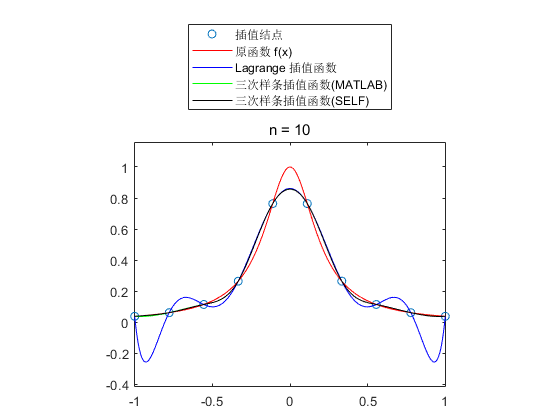

In [4]:
x_list = linspace(-1,1,10); % 用于插值的结点
x_list2 = linspace(-1,1,1000); % 用于绘图的结点
y1 = 1./(1+25*(x_list.^2)); % 用于插值的结点
y2 = 1./(1+25*(x_list2.^2)); % 用于绘图的结点

y3 = subs(func_Lagrange,x,x_list2); % Lagrange 插值
y4 = spline(x_list, y1, x_list2);



plot(x_list, y1, 'o')
hold on;
plot(x_list2, y2, 'r')
hold on;
plot(x_list2, y3, 'b')
hold on;
plot(x_list2, y4, 'g')

for i = 1:9
   x_list_i = linspace(x_list(1,i),x_list(1,i+1),100);
   y_list_i = subs(cubic_spline_interpolation(x_list, y1, 25/338, 25/338,i), x, x_list_i);
   plot(x_list_i, y_list_i,'k');
   hold on;
end
axis equal;
legend({'插值结点', '原函数 f(x)', 'Lagrange 插值函数', '三次样条插值函数(MATLAB)','三次样条插值函数(SELF)'}, 'Location','northoutside')
title('n = 10')

再来考虑 $n = 20$ 的情况.

计算其 Lagrange 插值函数:

In [5]:
x_list = linspace(-1,1,20);
y1 = 1./(1+25*(x_list.^2));
syms x
func_Lagrange_2 = expand(Lagrange_interpolation(x_list, y1));
disp(func_Lagrange_2)

- (397214318458218542224277496337890625*x^18)/15473172276755072732278868489216 + (836240670438354825735321044921875*x^16)/8746846962552330543967704064 - (283916262806158792653361676025390625*x^14)/1934146534594384091534858561152 + (4501302058693159097278882080078125*x^12)/37195125665276617144901126176 - (34865208612015006188488495517578125*x^10)/595122010644425874318418018816 + (10219725447076487887119312769921875*x^8)/595122010644425874318418018816 - (738680737429269451106443722953125*x^6)/241768316824298011441857320144 + (633870927513949926880154520641875*x^4)/1934146534594384091534858561152 - (334584256573274699338008089183525*x^2)/15473172276755072732278868489216 + 5346302830509110322057365767/5385719553343220582067131392
 



所以其 Lagrange 插值函数就为上式中函数.

而 MATLAB 自带有三次样条插值函数, 下面显示其分段的系数:

In [6]:
x_list_spline = linspace(-1,1,20);
y_list_spline = subs(func, x, x_list_spline);
for i = 1:19
    disp(num2str(i))
    cubic_spline_interpolation(x_list_spline, y_list_spline, 25/338,25/338,i)
end

1
 
ans =
 
(17983260211525601*x^3)/108086391056891904 + (21710667901367813*x^2)/36028797018963968 + (26960709360902601573387481*x)/34564439134160682664067072 + 753120236085633334103415263/1970173030647158911851823104
 
2
 
ans =
 
(61284726258477347*x^3)/216172782113783808 + (66074467339695861*x^2)/72057594037927936 + (527848728580204095948424441*x)/497362338117994823142080512 + 17620346909434724266355547939/37799537696967606558798118912
 
3
 
ans =
 
(107579258273380687*x^3)/216172782113783808 + (102622782088303761*x^2)/72057594037927936 + (3516007057249837898664917495*x)/2405382212084496977516036096 + 26120142204596494017938176383/45702262029605442572804685824
 
4
 
ans =
 
(53009384069093891*x^3)/54043195528445952 + (43523558864693485*x^2)/18014398509481984 + (1456106563684590761498670489*x)/680306061653700865842741248 + 28164334030561542559191891749/38777445514260949353036251136
 
5
 
ans =
 
(33088795715475201*x^3)/18014398509481984 + (70303929067359213*x^2)/18014398509481984 + (

接下来进行绘图:

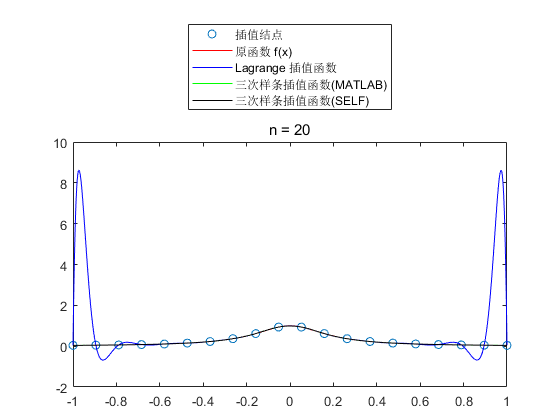

In [7]:
x_list = linspace(-1,1,20); % 用于插值的结点
x_list2 = linspace(-1,1,1000); % 用于绘图的结点
y1 = 1./(1+25*(x_list.^2)); % 用于插值的结点
y2 = 1./(1+25*(x_list2.^2)); % 用于绘图的结点

y3 = subs(func_Lagrange_2,x,x_list2); % Lagrange 插值
y4 = spline(x_list, y1, x_list2);

plot(x_list, y1, 'o')
hold on;
plot(x_list2, y2, 'r')
hold on;
plot(x_list2, y3, 'b')
hold on;
plot(x_list2, y4, 'g')

for i = 1:19
   x_list_i = linspace(x_list(1,i),x_list(1,i+1),100);
   y_list_i = subs(cubic_spline_interpolation(x_list, y1, 25/338, 25/338,i), x, x_list_i);
   plot(x_list_i, y_list_i,'k');
   hold on;
end

legend({'插值结点', '原函数 f(x)', 'Lagrange 插值函数', '三次样条插值函数(MATLAB)','三次样条插值函数(SELF)'}, 'Location','northoutside')
title('n = 20')

注意到在上图中, 原函数和三次样条插值函数由于过于接近而导致图像重叠.

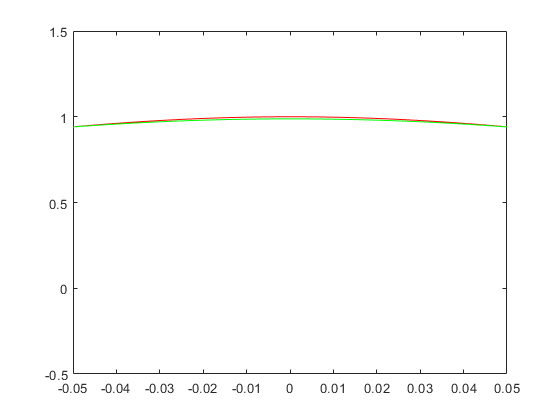

In [8]:
plot(x_list2, y2, 'r')
hold on;
plot(x_list2, y4, 'g')

axis([-0.05 0.05 -0.5 1.5])

## 第二题

对于给函数 $\displaystyle f(x) = \frac{1}{1 + 25x^2}$ 在区间 $[-1, 1]$ 上取 $x_i = -1 + 0.2i (i = 0,1,\dots,10)$, 试求三次曲线拟合, 试画出拟合曲线并打印出方程, 并与上一题作比较.

注意到, 为求三次曲线拟合, 就相当于解

$$A^{\mathrm{T}}Ax = A^{\mathrm{T}}b.$$

其中 x 为插值多项式的系数列向量, b 为函数值所成的列向量, A 为形如

$$
\begin{bmatrix}
	1 & x_0 & x_0^2 & x_0^3 \\
	1 & x_1 & x_1^2 & x_1^3 \\
   \dots & \dots & \dots & \dots \\
	1 & x_n & x_n^2 & x_n^3 \\
\end{bmatrix}
$$

的矩阵.

下面就进行求解:

In [9]:
format rat
x_list = -1:0.2:1;

b = [];
for i = x_list
    b = [b; 1/(1+25*i*i)];
end

A_cell = cell(11, 1);
for t = 1:size(x_list, 2)
    s = x_list(t);
    A_cell{t,1} = [1 s s^2 s^3];
end

A = [];
for p = 1:11
    A = [A;A_cell{p,1}];
end

A_trans = transpose(A);

x = inv(A_trans*A) * A_trans * b;
disp(x)

    1845/3811  
      -1/24019198012642644
    -394/685   
       1/72057594037927936




于是我们的三次方程就为

$$f(x) = \frac{1}{72057594037927936}x^3 - \frac{394}{685}x^2 -\frac{1}{24019198012642644}x + \frac{1845}{3811}.$$

就约为 

$$f(x) = - \frac{394}{685}x^2 + \frac{1845}{3811}.$$

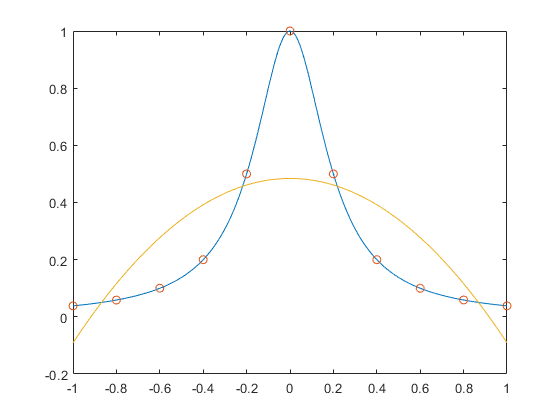

In [10]:
x_list2 = linspace(-1,1,1000); % 用于绘图的结点
x_list = -1:0.2:1;
y1 = 1./(1+25*(x_list2.^2)); % 用于绘图的结点
y2 = 1./(1+25*(x_list.^2));
syms x
func = 1/72057594037927936*x^3 - 394/685*x^2 - 1/24019198012642644*x + 1845/3811;
y3 = subs(func, x, x_list2);
plot(x_list2, y1);
hold on;
plot(x_list, y2,'o');
hold on;
plot(x_list2, y3)

与上一题相比较, 发现这样的最小二乘拟合与 Lagrange 插值, 三次样条插值有很大的区别.